#### OBJECTIF
L'inclusion financière reste l'un des principqux obstacles au developpement économique et hummain en Afrique. traditionnelement , l'accès aux comptes bancaires a été considéré comme un indicateur d'inclusion.

Notre role est de predire la probabilité que la personne ait un compte bancaire ou non(Oui=1, Non=0), pour chaque identifiant unique. Vous transformerez votre modèle sur 70 % des données et testerez votre modèle sur les 30 % dernieres données. 
Les données ont été collecter dans quatres pays d'afrique de l'EST(KENYA, RWANDA,TANZANIE, OUGANDA)

In [91]:
# Importons les librairies qui seront utilisées dans ces travaux.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle


In [3]:
#Affichons la base de données utilisée
data=pd.read_csv('Train.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Informations generale sur la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
# Identifions la variable àpredire.(bank_account)
data['bank_account']

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
23519     No
23520     No
23521     No
23522     No
23523     No
Name: bank_account, Length: 23524, dtype: object

In [8]:
# Identifions le nombre de ligne et de colonnes
data.shape
# La base de données contient 23524 lignes et 13 colonnes

(23524, 13)

In [9]:
# Identifions les types des differentes variables
data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [10]:
data.dtypes.value_counts()

object    10
int64      3
dtype: int64

In [13]:
# Identifions les valeurs manquantes
data.isna().sum()
#Nous ne detectons aucune valeurs manquantes dans la base de données.

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<AxesSubplot:xlabel='bank_account', ylabel='Count'>

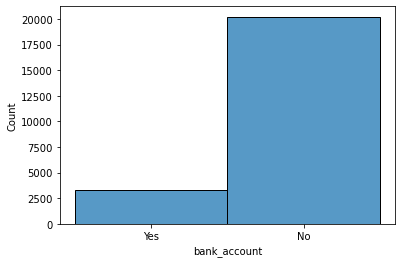

In [20]:
# Visualisation de la variable bank_account
sns.histplot(data['bank_account'])
# Nous constatons que le nombre de personnes n'ayant pas acces aux comptes bancaires est largement superieure a ceux qui en possede.

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bank_account', ylabel='count'>

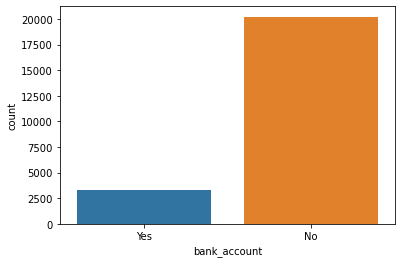

In [24]:
sns.countplot(data['bank_account'])

In [26]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [32]:
data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

###### Encodage des variables categorielles

In [36]:
# Identifier les valeurs presentes dans la variable bank_account

data['bank_account'].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
# Encodage de la variable bank_account
le=LabelEncoder()
data['bank_account']=le.fit_transform(data['bank_account'])
data['bank_account']

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

In [38]:
# Identifier les valeurs presentes dans la variable location_type

data['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [40]:
# Encodage de la variable location_type
le=LabelEncoder()

data['location_type']=le.fit_transform((data['location_type']))
data['location_type'].unique()

array([0, 1], dtype=int64)

In [42]:
# Identification des valeurs presentes dans la variable cellphone_access 
data['cellphone_access'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
# Encodage de la variable cellphone_access
le=LabelEncoder()

data['cellphone_access']=le.fit_transform((data['cellphone_access']))
data['cellphone_access'].unique()

array([1, 0])

In [44]:
#Identification des valeurs qui sont dans la variable gender_of_respondent
data['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

In [45]:
# Encodage de la variable gender_of_respondent
le=LabelEncoder()

data['gender_of_respondent']=le.fit_transform((data['gender_of_respondent']))
data['gender_of_respondent'].unique()

array([0, 1])

In [47]:
#Identification des valeurs qui sont dans la variable relationship_with_head
data['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [48]:
# Encodage de la variable relationship_with_head
le=LabelEncoder()

data['relationship_with_head']=le.fit_transform((data['relationship_with_head']))

data['relationship_with_head'].unique()

array([5, 1, 3, 0, 4, 2])

In [49]:
#Identification des valeurs qui sont dans la variable marital_status
data['marital_status'].unique()


array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [50]:
# Encodage de la variable marital_status
le=LabelEncoder()

data['marital_status']=le.fit_transform((data['marital_status']))
data['marital_status'].unique()

array([2, 4, 3, 0, 1])

In [51]:
#Identification des valeurs qui sont dans la variable education_level
data['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [52]:
# Encodage de la variable education_level
le=LabelEncoder()

data['education_level']=le.fit_transform((data['education_level']))
data['education_level'].unique()

array([3, 0, 5, 2, 4, 1])

In [53]:
#Identification des valeurs qui sont dans la variable job_type
data['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [54]:
# Encodage de la variable job_type
le=LabelEncoder()

data['job_type']=le.fit_transform((data['job_type']))
data['job_type'].unique()

array([9, 4, 3, 5, 2, 1, 8, 7, 0, 6])

In [55]:
# Verrification des types de la base de données
data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account               int32
location_type              int64
cellphone_access           int32
household_size             int64
age_of_respondent          int64
gender_of_respondent       int32
relationship_with_head     int32
marital_status             int32
education_level            int32
job_type                   int32
dtype: object

In [69]:
# Supprimons les variables country et year
data_user=data.drop(['country','year','uniqueid'],axis=1)

In [70]:
data_user.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,5,70,0,1,4,0,4
2,1,1,1,5,26,1,3,3,5,9
3,0,0,1,5,34,0,1,2,2,3
4,0,1,0,8,26,1,0,3,2,5


In [73]:
# Identifions la correlation entre la variable bank_account et les autres variables presente dans la base de données 
data_user.corr()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
bank_account,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011
education_level,0.323768,0.126128,0.252970,0.001613,-0.352970,0.119883,-0.017141,-0.123628,1.000000,0.043823
job_type,-0.064171,0.368606,-0.146141,-0.156835,-0.102770,-0.029734,0.041006,0.056011,0.043823,1.000000


In [74]:
# Créons deux variables x,y
x=data_user.drop('bank_account',axis=1)
y=data_user['bank_account']

#### Separons notre base de données en deux échantillons.(Echantillon d'entrainement et de test).

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

#### Creation d'une fonction evaluation_modele( Entrainement et evaluation)

In [76]:
# Creons la fonction evaluation_modele
def evaluation_modele(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    
    print(classification_report(y_test,y_pred))
    
    N,train_score, val_score = learning_curve(model,x_train,y_train, cv=4,scoring='f1', 
                                              train_sizes=np.linspace(0.1,1,10))
                                            
    plt.figure(figsize=(12, 8))
    
    plt.plot(N,train_score.mean(axis=1), label='train score')
    
    plt.plot(N,val_score.mean(axis=1), label='validation score') 
    
    plt.legend()

In [79]:
# Algorithmes utilisés au cours de cette étude.

RandomForestClassifier=RandomForestClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()
AdaBoostClassifier=AdaBoostClassifier()
SVC=SVC()
LogisticRegression=LogisticRegression()

In [80]:
# Creons un dictionnaire qui contient l'ensemble des algorithmes qui seront utilisés dans cette étude.
dict_of_models={
    'RandomForestClassifier':RandomForestClassifier,
    'GradientBoostingClassifier':GradientBoostingClassifier,
    'AdaBoostClassifier':AdaBoostClassifier,
    'LogisticRegression':LogisticRegression,
    'SVC':SVC
}

RandomForestClassifier
[[5783  311]
 [ 600  364]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6094
           1       0.54      0.38      0.44       964

    accuracy                           0.87      7058
   macro avg       0.72      0.66      0.69      7058
weighted avg       0.86      0.87      0.86      7058

GradientBoostingClassifier
[[5983  111]
 [ 658  306]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6094
           1       0.73      0.32      0.44       964

    accuracy                           0.89      7058
   macro avg       0.82      0.65      0.69      7058
weighted avg       0.88      0.89      0.87      7058

AdaBoostClassifier
[[5967  127]
 [ 667  297]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6094
           1       0.70      0.31      0.43       964

    accuracy                    

C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[[5986  108]
 [ 751  213]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6094
           1       0.66      0.22      0.33       964

    accuracy                           0.88      7058
   macro avg       0.78      0.60      0.63      7058
weighted avg       0.86      0.88      0.85      7058



C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

SVC
[[6094    0]
 [ 964    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      6094
           1       0.00      0.00      0.00       964

    accuracy                           0.86      7058
   macro avg       0.43      0.50      0.46      7058
weighted avg       0.75      0.86      0.80      7058



C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


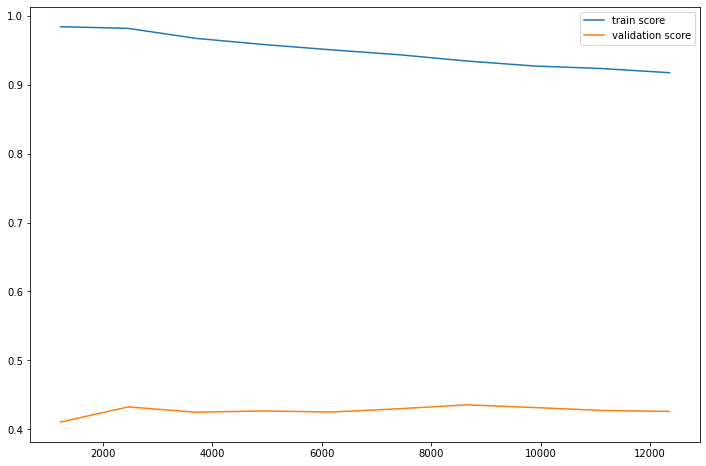

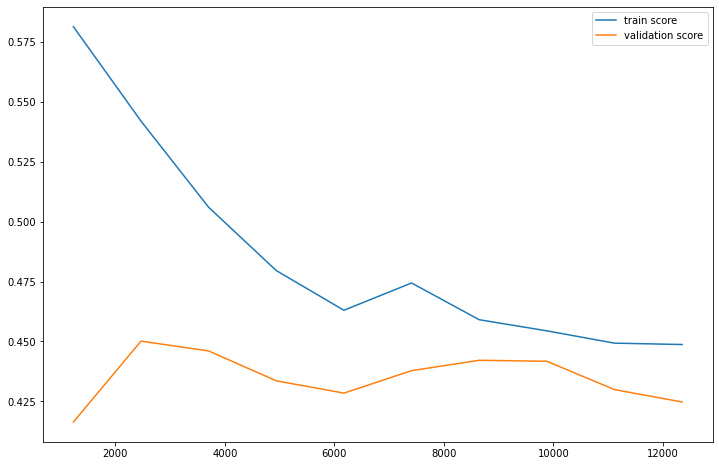

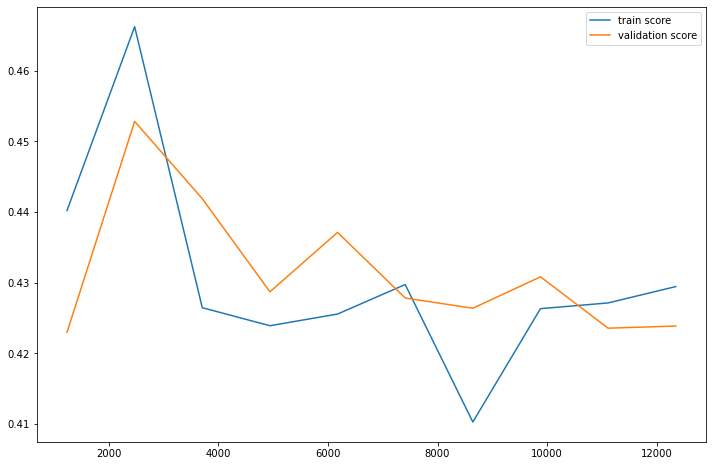

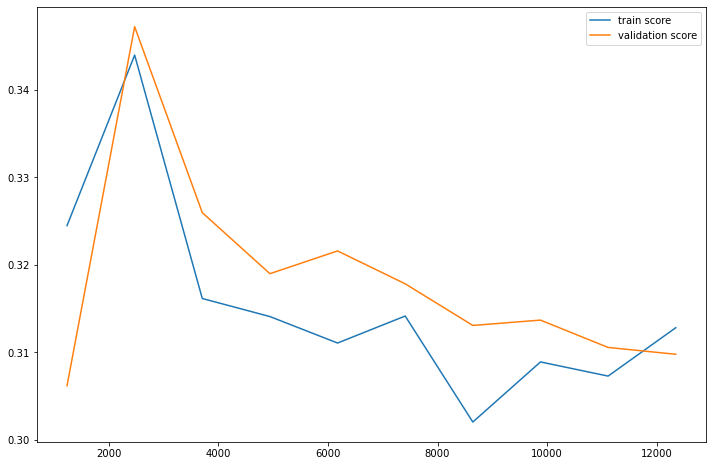

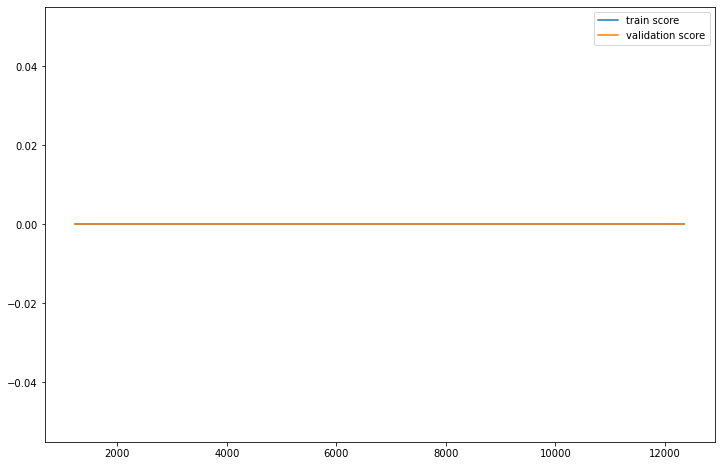

In [81]:
# Evaluation de chaque algorithme avec la fonction evaluation_model
for name,model in dict_of_models.items():
    print(name)
    evaluation_modele(model)

###### RESULTATS OBTENUS  ( APRES LA RECHERCHE DES MEILLEURS VALEURS POSSIBLE POUR TOUS LES PARAMETRES ).

Au cours de ces travaux le meilleur modèle pour detecter l'inclusion 

financière(qu'une personne ait un compte bancaire ou pas) est le 

GradientBoostingClassifier avec :

Precision=73 %

Reacall= 32 %

f1-score= 44 %

###### Nous enregistrons le meilleur modèle obtenu au cours de ces travaux dans un document.

In [92]:
# Enregistrement du modele
GradientBoostingClassifier=GradientBoostingClassifier()

In [93]:
GradientBoostingClassifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [94]:
pickle.dump(GradientBoostingClassifier,open('Inclusion Financière.pkl','wb'))